In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

# Load the MNIST dataset
mnist_dataset = tf.keras.datasets.mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist_dataset


In [10]:

# Display the total number of images
total_images = len(train_images)
print(f"Total number of images: {total_images}")


Total number of images: 60000


In [12]:
# Reshape the training set
num_samples, num_pixels = train_images.shape[0], train_images.shape[1] * train_images.shape[2]
train_images_reshaped = np.reshape(train_images, (num_samples, num_pixels))

# Get the range of pixel values
min_pixel_value = train_images_reshaped.min()
max_pixel_value = train_images_reshaped.max()

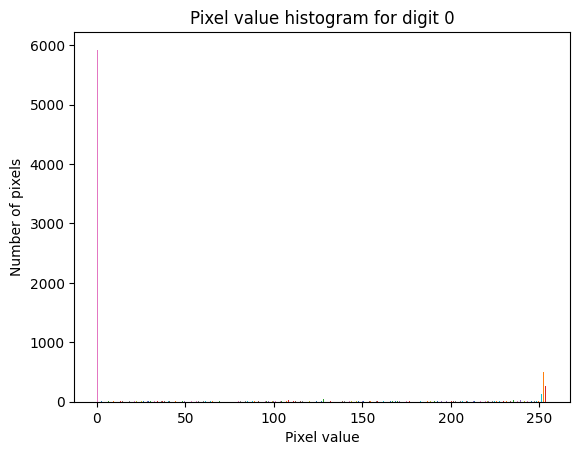

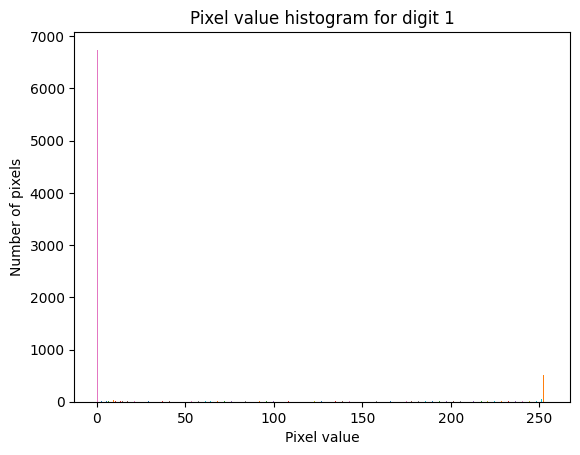

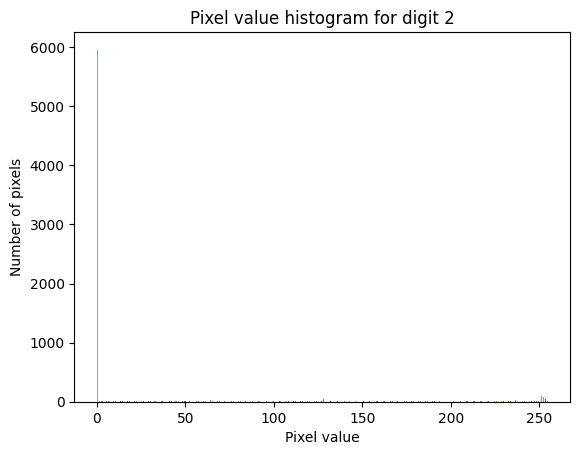

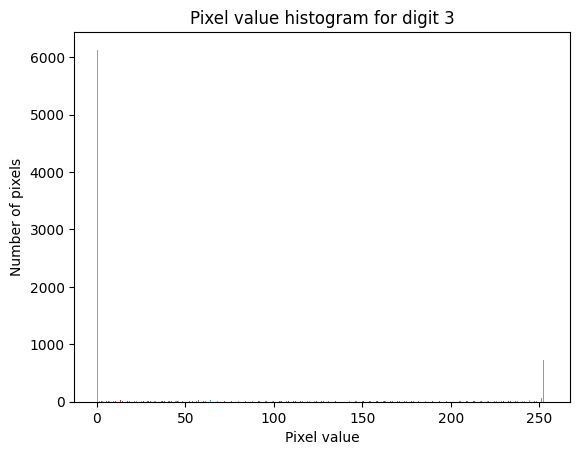

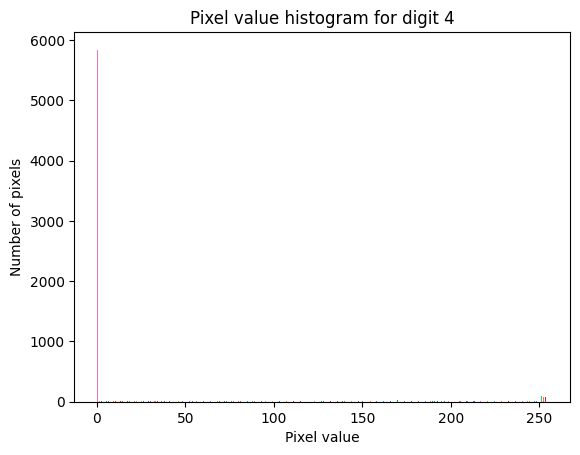

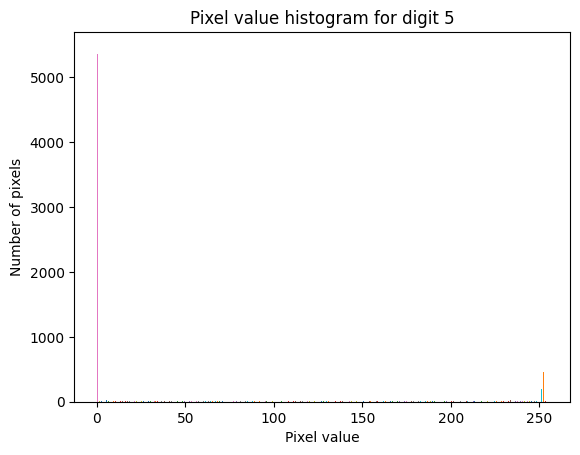

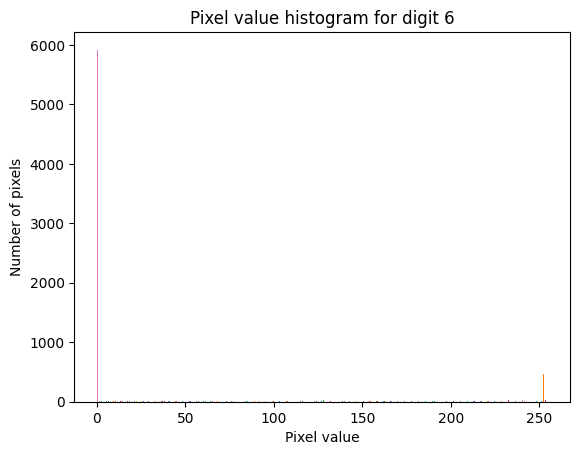

In [ ]:

# Plot a histogram of the pixel values for each digit
for digit in range(10):
    plt.figure()
    digit_pixels = train_images_reshaped[train_labels == digit]
    plt.hist(digit_pixels, bins=256, range=(min_pixel_value, max_pixel_value))
    plt.xlabel("Pixel value")
    plt.ylabel("Number of pixels")
    plt.title(f"Pixel value histogram for digit {digit}")
    plt.show()


In [ ]:
# Visualize randomly selected samples within each category
for digit in range(10):
    plt.figure(figsize=(6, 2))
    digit_samples = train_images[train_labels == digit][:3]
    for i, sample in enumerate(digit_samples):
        plt.subplot(1, 3, i + 1)
        plt.imshow(sample, cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Random samples for digit {digit}")
    plt.show()

In [ ]:
# Visualize a subset of data samples for inspection
num_samples_to_visualize = 30
plt.figure(figsize=(12, 6))
for i in range(num_samples_to_visualize):
    plt.subplot(3, 10, i + 1)
    plt.imshow(train_images[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Sample images for data inspection")
plt.show()

In [ ]:
# Reshape the test set
test_images_reshaped = np.reshape(test_images, (test_images.shape[0], num_pixels))

# Perform PCA on the training set
pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images_reshaped)

# Perform PCA on the test set
test_images_pca = pca.transform(test_images_reshaped)

# Perform t-SNE on the training set
tsne = TSNE(n_components=2)
train_images_tsne = tsne.fit_transform(train_images_reshaped)

In [ ]:
# Plot the PCA results
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels, cmap="jet")
plt.title("PCA")

In [ ]:
# Plot the t-SNE results
plt.subplot(122)
plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels, cmap="jet")
plt.title("t-SNE")
plt.show()

In [ ]:
# Train a Random Forest classifier on the original dataset without PCA
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_images_reshaped, train_labels)
end_time = time.time()


In [ ]:
# Print the training time
training_time_no_pca = end_time - start_time
print("Training time (no PCA):", training_time_no_pca)

# Evaluate the classifier without PCA on the test set
predicted_labels_no_pca = rf_classifier.predict(test_images_reshaped)
accuracy_no_pca = np.mean(predicted_labels_no_pca == test_labels)

# Print the accuracy without PCA
print("Accuracy (no PCA):", accuracy_no_pca)

# Train a Random Forest classifier on the reduced dataset using PCA
start_time = time.time()
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(train_images_pca, train_labels)
end_time = time.time()

In [ ]:
# Print the training time
training_time_pca = end_time - start_time
print("Training time (with PCA):", training_time_pca)

# Evaluate the classifier with PCA on the test set
predicted_labels_pca = rf_classifier_pca.predict(test_images_pca)
accuracy_pca = np.mean(predicted_labels_pca == test_labels)

# Print the accuracy with PCA
print("Accuracy (with PCA):", accuracy_pca)

1)The results of the code show that the Random Forest classifier achieves an accuracy of 97.05% on the MNIST test set without PCA.
When PCA is used, the accuracy of the classifier drops to 42.07%. This means that the classifier is less accurate.
The time  is also reduced when PCA is used. The time without PCA is 37.2 seconds, while the time with PCA is 11.2 seconds. This is because PCA reduces the size of the dataset, which makes it faster to train the classifier.

2)The histograms of the pixels show that they are evenly distributed.
3)The random samples of images for each digit show  the image nature whether blur or not.
4)The random samples to identify bad data samples show that there are a few images that are not properly labelled.

All these shoed that, Random Forest classifier can achieve high accuracy on the MNIST test set without PCA. However, the accuracy of the classifier drops when PCA is used to reduce the dimensionality of the dataset. The training time of the classifier is also reduced when PCA is used.